
Entrega #3 - Regressão Logistica

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: June 02, 2023
@credits: Prof. Eric Antonelo

------------------------------REGRESSÃO LOGISTICA-------------------------------


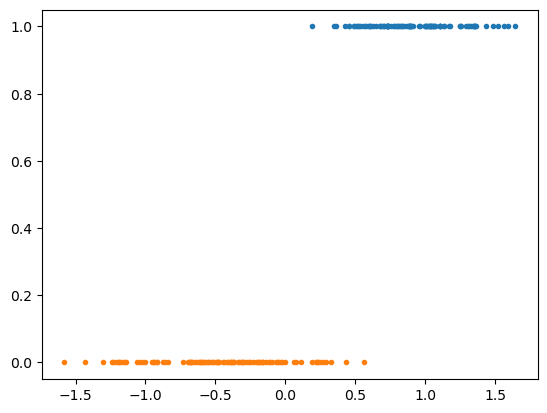

0 Custo:  0.675282880952281 ;; Acuracia:  0.5
1 Custo:  0.6583163667222764 ;; Acuracia:  0.5
2 Custo:  0.6421962499866782 ;; Acuracia:  0.5
3 Custo:  0.6268733378504271 ;; Acuracia:  0.5
4 Custo:  0.6123007529856116 ;; Acuracia:  0.5
5 Custo:  0.5984339988490897 ;; Acuracia:  0.5
6 Custo:  0.5852309791438918 ;; Acuracia:  0.52
7 Custo:  0.5726519804012697 ;; Acuracia:  0.56
8 Custo:  0.5606596256357933 ;; Acuracia:  0.595
9 Custo:  0.5492188060141706 ;; Acuracia:  0.625
10 Custo:  0.5382965964591216 ;; Acuracia:  0.685
11 Custo:  0.5278621601370953 ;; Acuracia:  0.72
12 Custo:  0.5178866458864216 ;; Acuracia:  0.735
13 Custo:  0.5083430818483938 ;; Acuracia:  0.775
14 Custo:  0.49920626787408195 ;; Acuracia:  0.8
15 Custo:  0.4904526686926991 ;; Acuracia:  0.825
16 Custo:  0.4820603093366627 ;; Acuracia:  0.83
17 Custo:  0.4740086739147412 ;; Acuracia:  0.865
18 Custo:  0.46627860849743086 ;; Acuracia:  0.88
19 Custo:  0.4588522286172546 ;; Acuracia:  0.895
20 Custo:  0.451712831680834

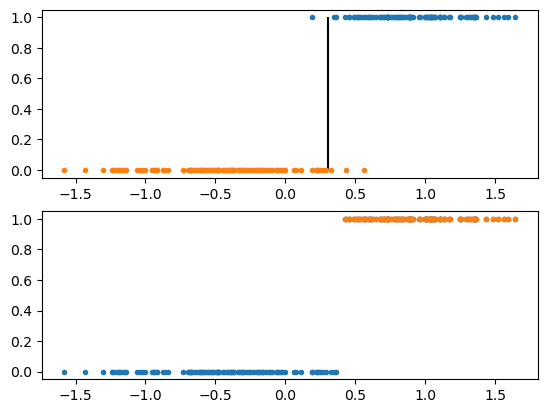

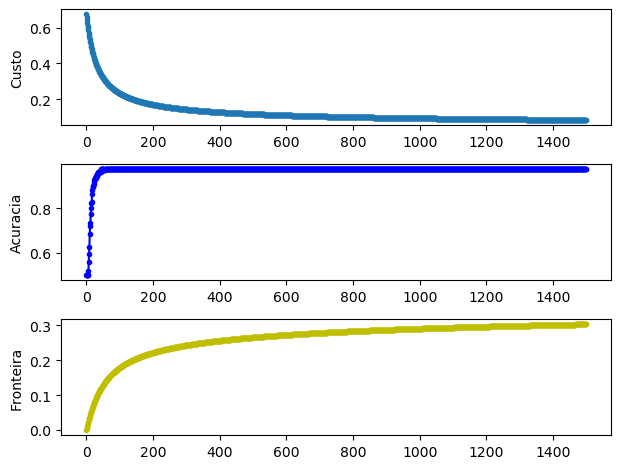

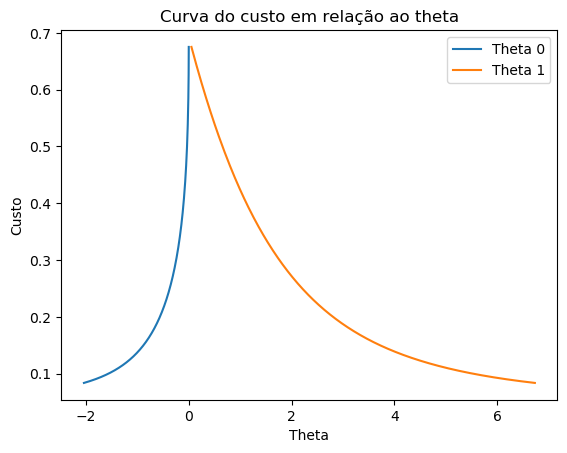

Questão 1:

b) A acurácia vai melhorando no decorrer das épocas, mas não chega a 100%. Foi possivel alcançar 98%.
Isso ocorre pois os dados de entrada podem possuir ruidos ou não são linearmente separáveis.
Sendo assim, não será encontrado um limite de decisão com 100% de accurácia.

d) Para 1500 épocas, foram testados valores de alpha entre 0,001 a 50.
Para valores muito baixos o custo reduzia de forma quase nula. Já para valores muito grandes,
o custo e acurácia ficam variando entre baixo e alto não atingindo seu valor ótimo.
Em relação a regressão linear, percebeu-se que valores altos que antes divergiam,
para a regressão logistica acontece um salto para o valor otimo, porém ocorre a variação
proximo ao valor de maior acurácia (Ex. com alpha=50 ficou variando entre 90% a 95% 

---------------------------FIM - REGRESSÃO LOGISTICA----------------------------
----------------------REGRESSÃO LOGISTICA COM 2 VARIAVEIS-----------------------


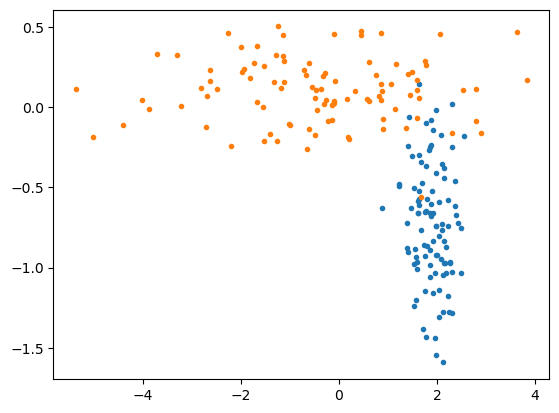

0 Custo:  0.6415723694716705 ;; Acuracia:  0.5
1 Custo:  0.6029709101245935 ;; Acuracia:  0.49
2 Custo:  0.573603393553414 ;; Acuracia:  0.66
3 Custo:  0.5507977035388206 ;; Acuracia:  0.87
4 Custo:  0.5326961497088495 ;; Acuracia:  0.905
5 Custo:  0.5180141450192444 ;; Acuracia:  0.905
6 Custo:  0.5058577126773851 ;; Acuracia:  0.905
7 Custo:  0.49559719178679634 ;; Acuracia:  0.9
8 Custo:  0.48678269869319674 ;; Acuracia:  0.9
9 Custo:  0.47908798600628183 ;; Acuracia:  0.9
10 Custo:  0.47227299778843007 ;; Acuracia:  0.905
11 Custo:  0.46615863660058054 ;; Acuracia:  0.9
12 Custo:  0.4606095377250528 ;; Acuracia:  0.9
13 Custo:  0.45552214431196214 ;; Acuracia:  0.9
14 Custo:  0.450816335425155 ;; Acuracia:  0.9
15 Custo:  0.44642946764471453 ;; Acuracia:  0.9
16 Custo:  0.4423120788514895 ;; Acuracia:  0.9
17 Custo:  0.4384247522368516 ;; Acuracia:  0.9
18 Custo:  0.43473580072859136 ;; Acuracia:  0.9
19 Custo:  0.43121953874973856 ;; Acuracia:  0.9
20 Custo:  0.42785497937914846 ;

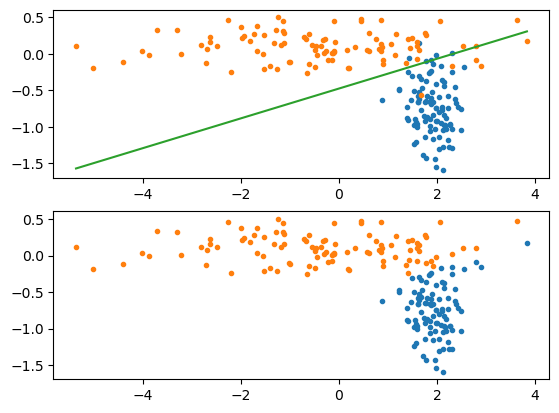

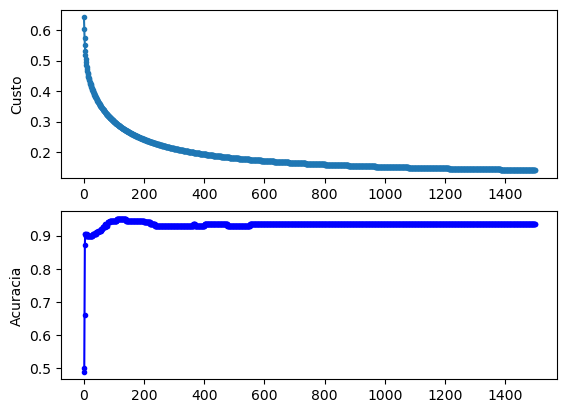

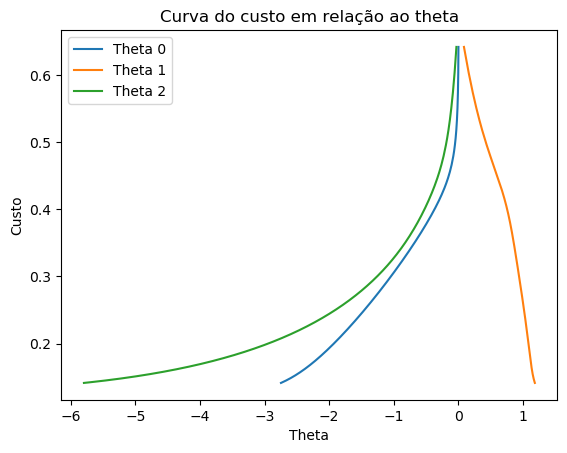

-------------------FIM - REGRESSÃO LOGISTICA COM 2 VARIAVEIS--------------------


In [16]:
## - Aula síncrona - Regressão Logística
# Prof. Eric Antonelo
"""
Entrega #3 - Regressão Logistica

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: June 02, 2023
@credits: Prof. Eric Antonelo
"""
print(__doc__)

import numpy as np
from matplotlib.pyplot import subplot, plot, show, clf, vlines
import matplotlib.pyplot as plt

print("REGRESSÃO LOGISTICA".center(80,"-"))
# conjunto de dados {(x,y)}, x: unidimensional, y: classe in {0,1}

mean0, std0 = -0.4, 0.5
mean1, std1 = 0.9, 0.3
m = 200

# feature 
x1s = np.random.randn(m//2) * std1 + mean1  # 100 pontos p/ classe 1
x0s = np.random.randn(m//2) * std0 + mean0  # 100 pontos p/ classe 0

xs = np.hstack((x1s, x0s))

ys = np.hstack(( np.ones(m//2), np.zeros(m//2)))

## -
plot(xs[:m//2],ys[:m//2],'.')
plot(xs[m//2:],ys[m//2:],'.')
show()


def sigmoid(z):  # logistica
    return 1/(1+np.exp(-z))

def features(x): # array concatenando 1 com x
    return np.array([1, x])

''' hipótese 
''' 
def h(x, theta):
    h = np.dot(x, theta)
    return h 

''' função de custo para um exemplo; entropia cruzada
'''
def cost(h, y):
    c = -y* np.log(sigmoid(h)) -(1-y) * np.log(1-sigmoid(h))
    return c  

''' função de custo 
'''
def J(theta, xs, ys):
    soma = 0
    for x, y in zip(xs, ys):
        if type(x) is np.ndarray:
            x = np.array([1, x[0], x[1]])
        else:
            x = features(x)
        soma += cost(h(x, theta), y)
    return (1/len(xs)) * soma


''' derivada parcial com respeito a theta[i] 
'''
def gradient(j, theta, xs, ys):
    soma = 0
    for x, y in zip(xs, ys):
        if type(x) is np.ndarray:
            x = np.array([1, x[0], x[1]])
        else:
            x = features(x)
        soma +=  (sigmoid(np.dot(x,theta)) - y) * x[j]
    return (1.0/len(xs)) * soma

def classifica(h):
    return h >= 0.5

def fronteira(theta):
    return (-theta[0]/theta[1])

def plot_fronteira(theta):
    vlines(fronteira(theta), 0, 1)


''' plota em subplots: - os dados, com a fronteira de decisao
    - e os dados classificados
'''
def print_modelo(theta, xs, ys):
    subplot(2,1,1)
    # dataset
    plot(xs[:m//2],ys[:m//2],'.')
    plot(xs[m//2:],ys[m//2:],'.')
    plot_fronteira(theta)

    # model classifications
    subplot(2,1,2)
    ys_ = np.array( [h(np.stack([1,x]), theta) for x in xs] )
    ys_ = classifica( ys_ )    ## 0, ou 1
    plot(xs,ys_,'.')
    plot(xs[ys_],ys_[ys_],'.')

    show()


def accuracy(ys, predictions):
    num = sum(ys == predictions)
    return num/len(ys)

# plota os recorded_cost em relação aos thetas
def plot_cost_thetas(recorded_cost, recorded_theta):
    plt.title("Curva do custo em relação ao theta")
    plt.plot(recorded_theta, recorded_cost, '-')
    plt.legend(['Theta 0', 'Theta 1', 'Theta 2'])
    plt.ylabel('Custo')
    plt.xlabel('Theta')
    plt.show()


alpha = 0.15
theta = np.array([0.,0.])

custo = []
acc = []
fronteiras = []
recorded_theta = []

epochs = 1500


for k in range(epochs):

    if k < 10 and False:
        print_modelo(theta, xs, ys)

    # gradient descent
    
    new_theta = [theta[i] - alpha * gradient(i, theta, xs, ys) for i in range(len(theta))]
    for i in range(len(theta)):
        theta[i] = new_theta[i] 
    
    custo.append( J(theta, xs, ys) )
    predictions = np.array([classifica(h(np.stack([1,x]), theta)) for x in xs])
    acc.append(accuracy(ys, predictions))
    fronteiras.append( fronteira(theta) )
    recorded_theta.append(new_theta)
    
    print(k, 'Custo: ', custo[-1], ';; Acuracia: ', acc[-1] )

    
## -
print_modelo(theta, xs, ys)

## -
n = 3
subplot(n,1,1)
plot(custo, '.-', label='custo')
plt.ylabel('Custo')
subplot(n,1,2)
plot(acc, '.-b', label='acuracia')
plt.ylabel('Acuracia')

subplot(n,1,3)
plot(fronteiras, '.-y')
plt.ylabel('Fronteira')
plt.tight_layout()
show()

plot_cost_thetas(custo, recorded_theta)

# Respostas da primeira questão
print("Questão 1:\n")
print("b) A acurácia vai melhorando no decorrer das épocas, mas não chega a 100%. Foi possivel alcançar 98%.")
print("Isso ocorre pois os dados de entrada podem possuir ruidos ou não são linearmente separáveis.")
print("Sendo assim, não será encontrado um limite de decisão com 100% de accurácia.\n")

print("d) Para 1500 épocas, foram testados valores de alpha entre 0,001 a 50.")
print("Para valores muito baixos o custo reduzia de forma quase nula. Já para valores muito grandes,")
print("o custo e acurácia ficam variando entre baixo e alto não atingindo seu valor ótimo.")
print("Em relação a regressão linear, percebeu-se que valores altos que antes divergiam,")
print("para a regressão logistica acontece um salto para o valor otimo, porém ocorre a variação")
print("proximo ao valor de maior acurácia (Ex. com alpha=50 ficou variando entre 90% a 95% \n")
print("FIM - REGRESSÃO LOGISTICA".center(80,"-"))

# Regressao logistica com 2 variaveis
import reglog_2var_dados as reglog

def print_modelo_2(theta, xs, ys):

    subplot(2,1,1)
    # dataset
    plot(xs[:m//2,0], xs[:m//2,1], '.')
    plot(xs[m//2:,0], xs[m//2:,1], '.')
    plot_x= [np.min(xs), np.max(xs)]
    plot_y= -1/theta[2]*(theta[0] + np.dot(theta[1],plot_x)) 
    decision_boun = plot(plot_x, plot_y)

    # model classifications
    subplot(2,1,2)
    ys = np.array( [h(np.array([1, x[0], x[1]]), theta) for x in xs] )
    ys = classifica( ys )    ## 0, ou 1
    pos= ys== 1
    neg= ys== 0
    plot(xs[pos, 0], xs[pos, 1], '.')
    plot(xs[neg, 0], xs[neg, 1], '.')
    show()

alpha = 0.15
theta = np.array([0.,0.,0.])

custo = []
acc = []
fronteiras = []
recorded_theta = []

epochs = 1500

print("REGRESSÃO LOGISTICA COM 2 VARIAVEIS".center(80,"-"))

plot(reglog.x1s[:,0], reglog.x1s[:,1], '.')
plot(reglog.x0s[:,0], reglog.x0s[:,1], '.')
show()


for k in range(epochs):

    # gradient descent
    
    new_theta = [theta[i] - alpha * gradient(i, theta, reglog.xs, reglog.ys) for i in range(len(theta))]
    for i in range(len(theta)):
        theta[i] = new_theta[i] 
    
    custo.append( J(theta, reglog.xs, reglog.ys) )
    predictions = np.array([classifica(h(np.array([1, x[0], x[1]]), theta)) for x in reglog.xs])
    acc.append(accuracy(ys, predictions))
    fronteiras.append( fronteira(theta) )
    recorded_theta.append(new_theta)
    
    print(k, 'Custo: ', custo[-1], ';; Acuracia: ', acc[-1] )

    
## -
print_modelo_2(theta, reglog.xs, reglog.ys)

## -
n = 2
subplot(n,1,1)
plot(custo, '.-', label='custo')
plt.ylabel('Custo')
subplot(n,1,2)
plot(acc, '.-b', label='acuracia')
plt.ylabel('Acuracia')
show()

plot_cost_thetas(custo, recorded_theta)
print("FIM - REGRESSÃO LOGISTICA COM 2 VARIAVEIS".center(80,"-"))